# Принятие решений в бизнесе

***Описание проекта:*** аналитиком крупного интернет-магазина вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки магазина.

***Цель проекта:*** необходимо приоритизировать гипотезы, предоставленные отделом Маркетинга, провести А/В тестирование, интерпретировать его результаты и предосавтить аргументы в пользу рекомендуемого решения.

***Описание данных:***

Список гипотез (файл hypothesis.csv)
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

Информация о заказах пользователей в интернет-магазине (файл orders.csv.)
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Информация о посещениях пользователями интернет-магазина (файл visitors.csv)
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

***План работы:***

1. Приоритезация гипотез;
2. Обзор и предобработка данных;
3. Подготовка к проведению А/В-теста;
4. Проведение и анализ А/В-теста.

**Часть 1. Приоритизация гипотез.**

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()
import scipy.stats as stats
import seaborn as sns
sns.set(rc={'figure.figsize':(9,5)})

In [2]:
data = pd.read_csv('E:\Таня\Учеба\Резюме\Проект Принятие решений в бизнесе\hypothesis.csv')

In [3]:
data.columns = data.columns.str.lower()
pd.options.display.max_colwidth = 130
data.head(5)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Задача 1. Применить фреймворк ICE для приоритизации гипотез и отсортировать их по убыванию приоритета.

In [4]:
data['ice'] = round((data['impact']*data['confidence']/data['efforts']),2)
data.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


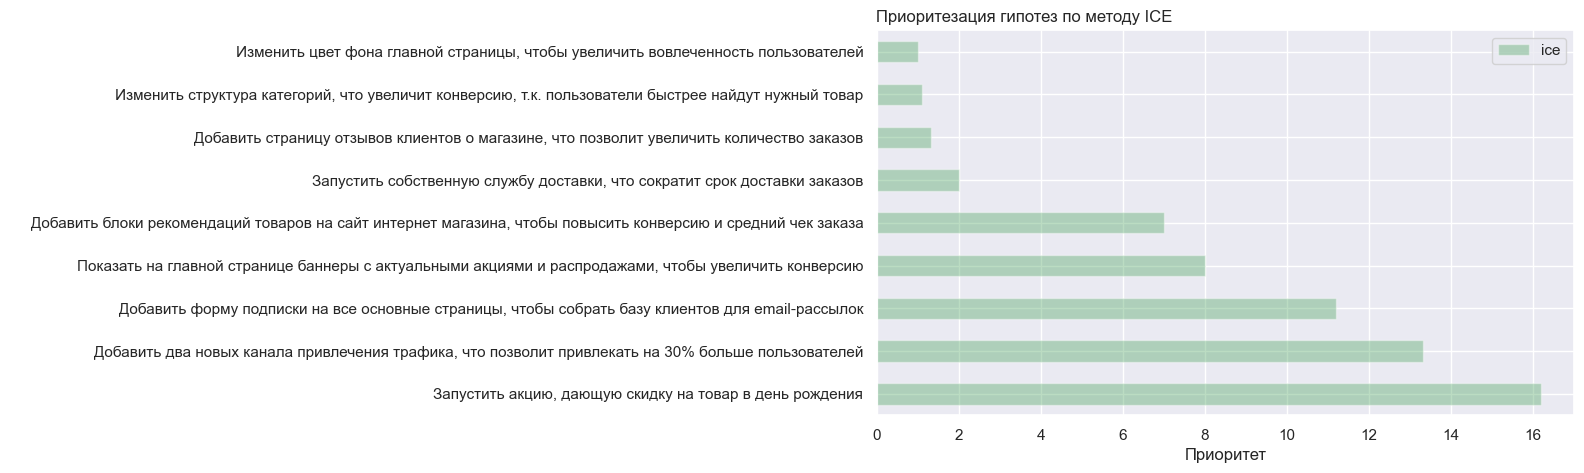

In [5]:
ax = (data[['hypothesis', 'ice']]
      .set_index('hypothesis')
      .sort_values('ice', ascending=False)
      .plot(kind='barh', color='g', alpha=0.4)
     )
ax.grid(True)
ax.set_xlabel('Приоритет')
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу ICE', loc='left')
plt.show()

Задача 2. Применить фреймворк RICE для приоритизации гипотез и отсортировать их по убыванию приоритета.

In [6]:
data['rice'] = data['reach']*data['impact']*data['confidence']/data['efforts']
data.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


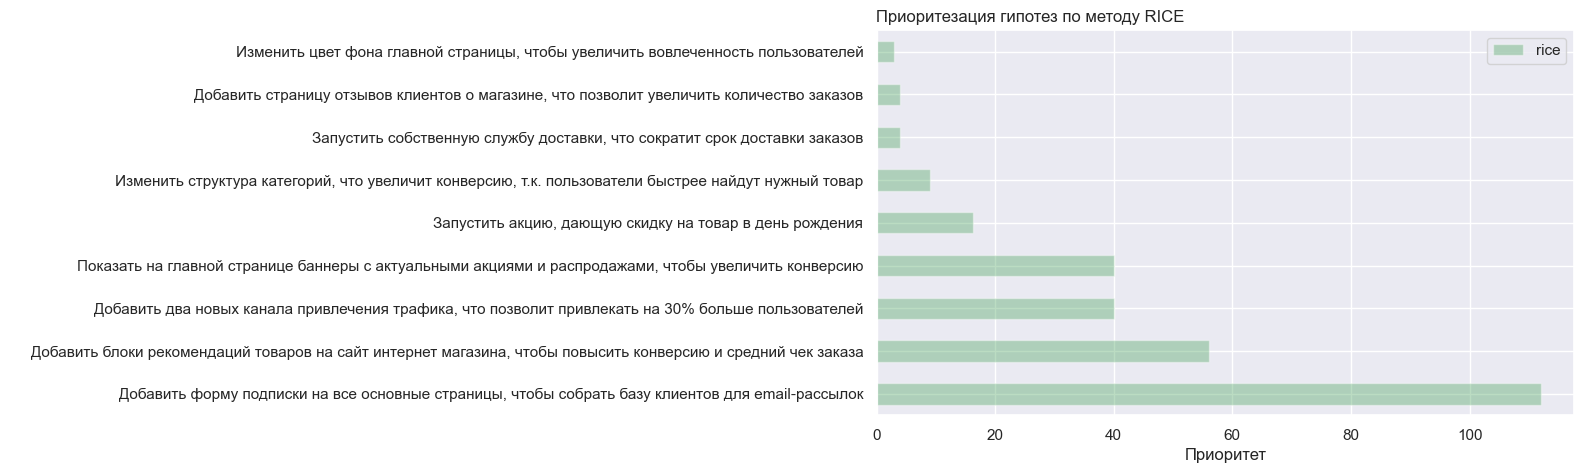

In [7]:
ax = (data[['hypothesis', 'rice']]
      .set_index('hypothesis')
      .sort_values('rice', ascending=False)
      .plot(kind='barh', color='g', alpha=0.4)
     )
ax.grid(True)
ax.set_xlabel('Приоритет')
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу RICE', loc='left')
plt.show()

Задача 3. Вывод о том, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

При применении способа приоретизации RICE наиболпее перспективной оказалась гипотеза № 7 "Добавить форму подписки на все страницы, чтобы собарть базу клиентов для e-mail рассылок". 
Так произошло потому, что у неё самый высокий параметр Reach (охват пользователей): 10 по 10-балльной шкале.

***Выводы по 1-й части проекта (в части приоритизации гипотез из списка, предоставленных отделом Маркетинга): следует в первую очередь обратить внимание на гипотезы:***

    - "Запустить акцию, дающую скидку на товар в день рождения",
    - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",
    - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";

Если ранжирование гипотез должно включать в себя и охват пользователей интернет-магазина, то места необходимо распределить таким образом:

    - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",
    - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",
    - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".

**Часть 2. Анализ A/B-теста**

*Ознакомление с данными и их предобработка*

In [8]:
orders = pd.read_csv('E:\Таня\Учеба\Резюме\Проект Принятие решений в бизнесе/orders.csv')
visitors = pd.read_csv('E:\Таня\Учеба\Резюме\Проект Принятие решений в бизнесе/visitors.csv')
orders = orders.rename(columns = {'visitorId':'visitor_id', 'transactionId':'transaction_id'})

In [9]:
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


***Предобработка данных***

    1. Названия столбцов изменены выше - приведены к "змеиному" регистру
    2. Меняю тип данных для столбцов с датами
    3. Проверка на наличие дубликатов

In [11]:
#изменение типа данных для столбцов с датами

visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [12]:
#проверка таблиц на наличие дубликатов

visitors.duplicated().sum()
orders.duplicated().sum()

0

***Дубликаты не обнаружены, перехожу к следующему этапу исследования: подготовка к А/В тесту.***

**Подготовка к А/В тесту**

In [13]:
#проверка количества групп в А/В тесте
print('Количество групп в А/В тесте:', orders['group'].nunique())

Количество групп в А/В тесте: 2


In [14]:
#изучение временного интервала теста

print('Дата начала теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


In [15]:
#получение данных о количестве пользователей в каждой группе (по таблице с заказами)

orders.groupby(['group'])['visitor_id'].count()

group
A    557
B    640
Name: visitor_id, dtype: int64

In [16]:
#проверка, не попадают ли какие-то пользователи в обе группы (по таблице с заказами)

orders.groupby('visitor_id').agg({'group':'nunique'}).query('group>1').count()

group    58
dtype: int64

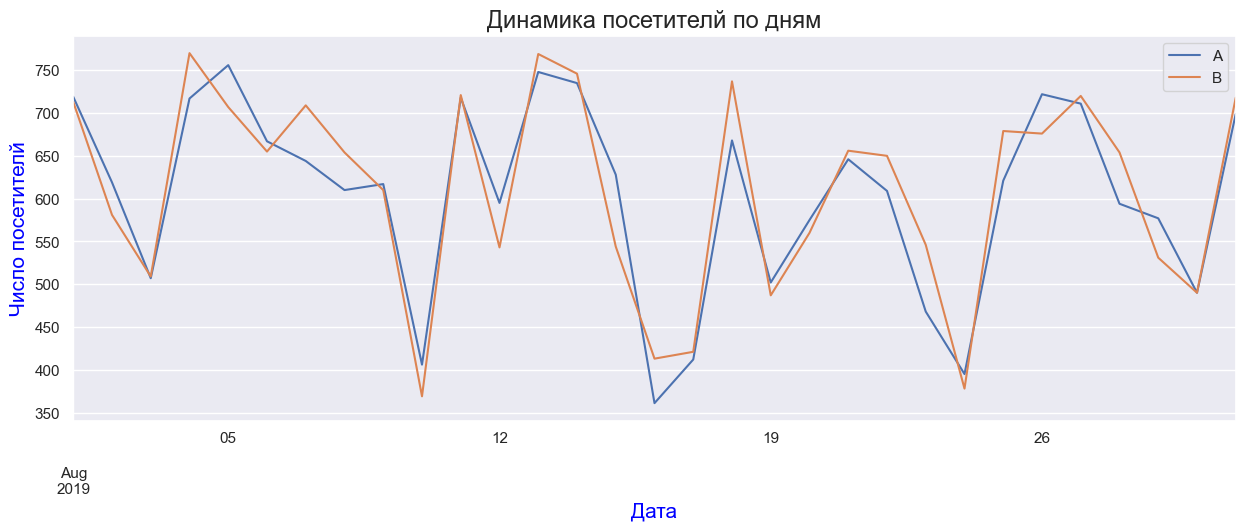

In [17]:
#изучение динамики посетителей по дням по группам (visitos)

visistors_dayly = visitors.pivot_table(
              index = 'date',
              columns = 'group',
              values = 'visitors',
              aggfunc = 'sum')

visistors_dayly.plot(grid=True, figsize=(15, 5))

plt.legend() 
plt.title('Динамика посетителй по дням', fontsize=17)
plt.xlabel('Дата', fontsize=15, color='blue')
plt.ylabel('Число посетителй', fontsize=15, color='blue')
plt.show()

**Задача 1.** Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Необходимо создать датафрейм, содержащий информацию о дате, группе (А или В), кумулятивных количестве заказов, среднем чеке и кумулятивном количестве посетителей магазина.

In [18]:
datesGroups = orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitor_id': 'nunique',
            'transaction_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

In [19]:
cumulativeData

,date,group,visitor_id,transaction_id,revenue,visitors
0,2019-08-01,A,20,24,148579,719
1,2019-08-01,B,20,21,101217,713
2,2019-08-02,A,38,44,242401,1338
3,2019-08-02,B,43,45,266748,1294
4,2019-08-03,A,62,68,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,544,596,5559398,17708
58,2019-08-30,A,493,545,4022970,18037
59,2019-08-30,B,567,620,5774631,18198
60,2019-08-31,A,503,557,4084803,18736


In [20]:
#проверка, совпадают ли минимальная и максимальная даты в полученном датафрейме с минимальной и максимальной датой в исходных данных

print('Дата начала теста:', cumulativeData['date'].min())
print('Дата окончания теста:', cumulativeData['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


Считаю, что датафрейм cummulativeData создан корректно.

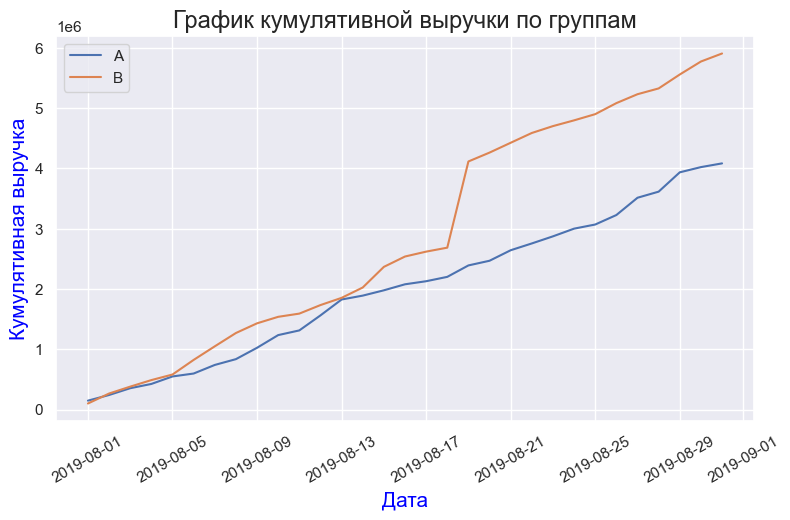

In [21]:
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transaction_id']]

#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transaction_id']]

#строим график выручки группы А

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

#строим график выручки группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.title('График кумулятивной выручки по группам', fontsize=17)
plt.xlabel('Дата', fontsize=15, color='blue')
plt.ylabel('Кумулятивная выручка', fontsize=15, color='blue')
plt.xticks(rotation=30)
plt.show()

Кумулятивная выручка группы А растет линейно, но она меньше, чем у группы В.
При этом в группе В есть резкий скачок (в период с 17 по 21 августа), что может свидетельствовать о резком росте числа заказов, либо о появлении очень дорогих заказов.

**Задача 2.** Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

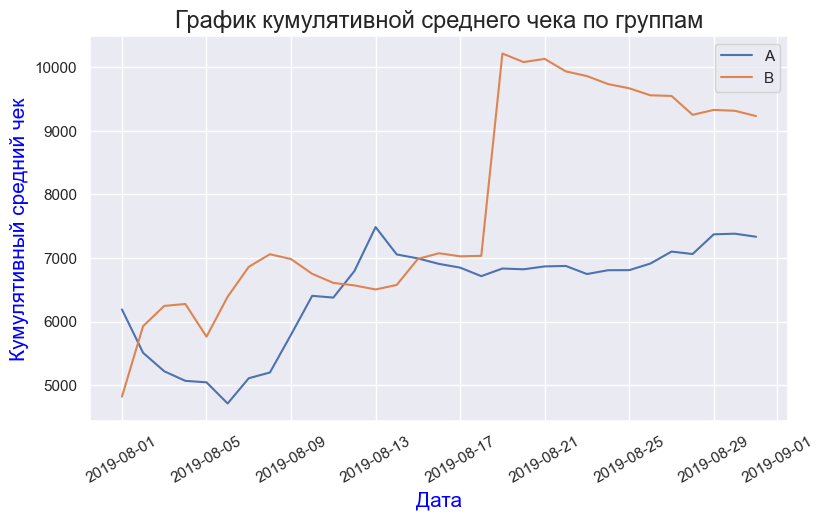

In [22]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transaction_id'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transaction_id'], label='B')
plt.legend()
plt.title('График кумулятивной среднего чека по группам', fontsize=17)
plt.xlabel('Дата', fontsize=15, color='blue')
plt.ylabel('Кумулятивный средний чек', fontsize=15, color='blue')
plt.xticks(rotation=30);

Кумулятивные значения среднего чека колеблются и также имеют заметные выбросы, что предположительно вновь свидетельствует о наличии аномальных значений в данных и требует дополнительного анализа.

**Задача 3.** Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

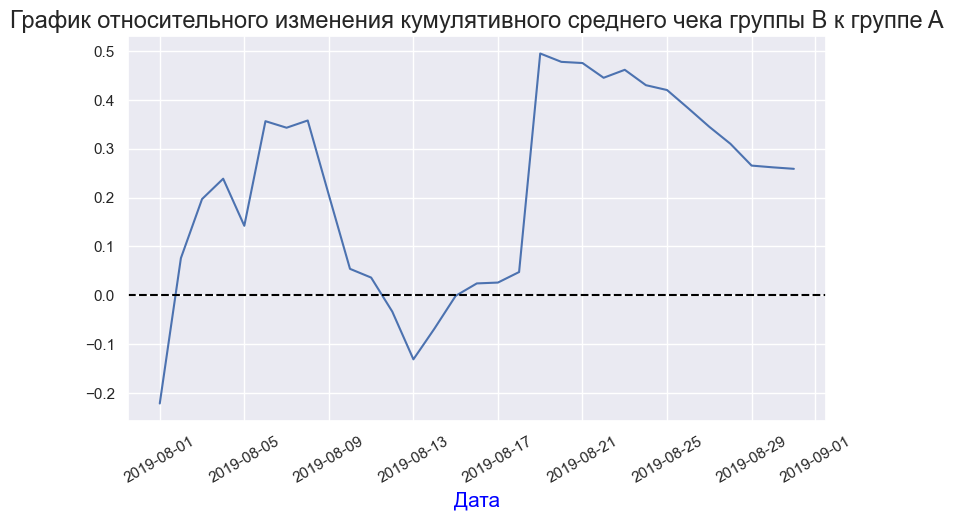

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transaction_idB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transaction_idA'])-1)

#добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=30)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=17)
plt.xlabel('Дата', fontsize=15, color='blue');

Заметно значительное изменение результатов теста в некоторые даты.
Возможно, именно в эти дни были совершены аномальные заказы.

**Задача 4.** Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

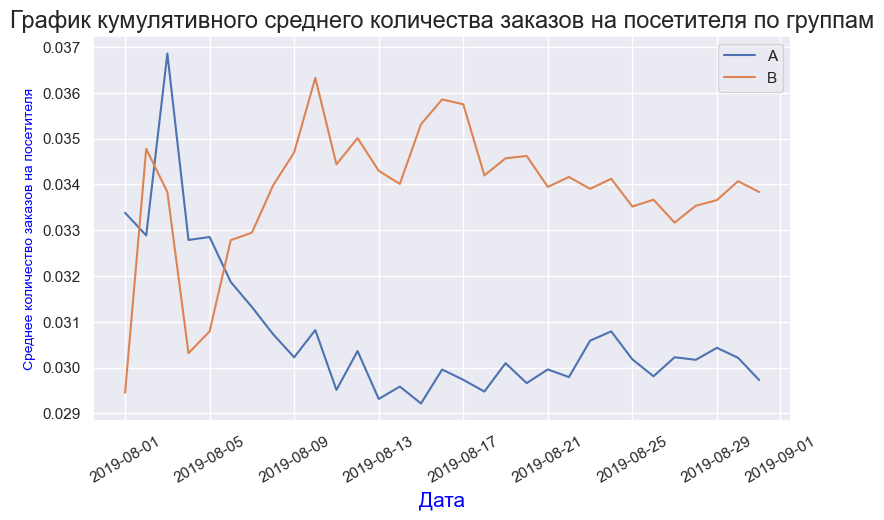

In [24]:
#считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['transaction_id']/cumulativeData['visitors']

#отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=17)
plt.xlabel('Дата', fontsize=15, color='blue')
plt.ylabel('Среднее количество заказов на посетителя', fontsize=10, color='blue')
plt.xticks(rotation=30);

Заметные колебания значений среднего количества заказов на посетителя в каждой группе постепенно выравниваются, при этом результат группы В выше относительно группы А.

**Задача 5.** Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

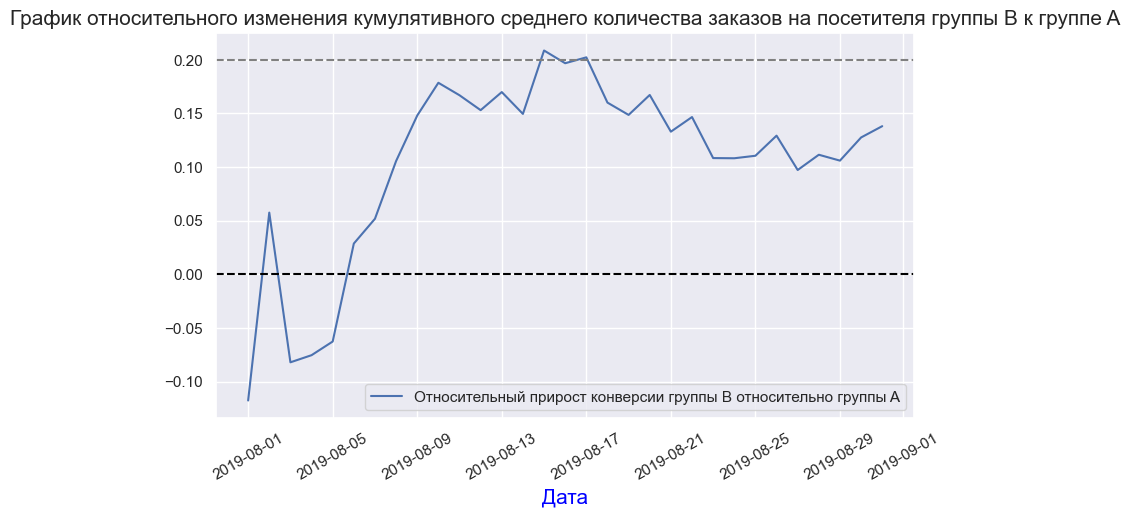

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=15)
plt.xlabel('Дата', fontsize=15, color='blue')
plt.xticks(rotation=30);

В начале теста группа В проигрывала группе А, но затем тенденция изменилась. 
Так как ранее проведенные тесты указывали на наличие аномальных заказов, необходимо проанализировать данные после чистки от выбросов.

**Задача 6.** Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


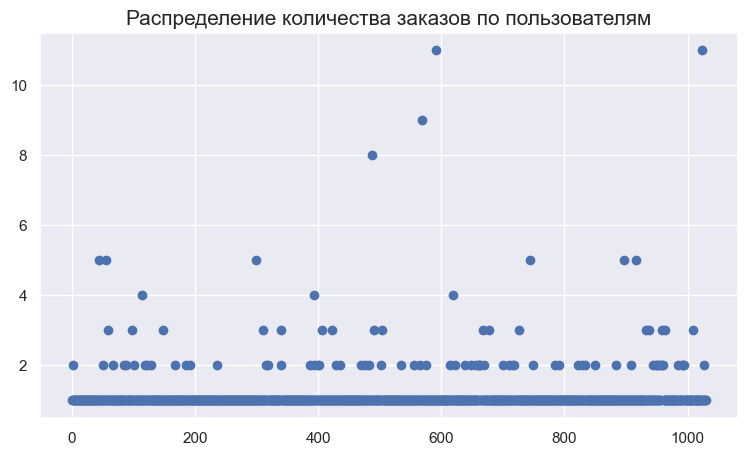

In [26]:
ordersByVisitors = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByVisitors.columns = ['visitor_id', 'orders']

print(ordersByVisitors.sort_values(by='orders', ascending=False).head(10))

#серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByVisitors)))
plt.scatter(x_values, ordersByVisitors['orders']) 
plt.title('Распределение количества заказов по пользователям', fontsize=15);

Много пользователей с 2-3 заказами. Их точная доля не ясна, поэтому сложно понять, можно ли считать их выбросами или нет.

**Задача 7.** Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [27]:
print(ordersByVisitors.sort_values(by='orders', ascending=False).head(10))
np.percentile(ordersByVisitors['orders'], [95, 99])

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


array([2., 4.])

Не более 5% пользователей совершали больше 2-х заказов. И только 1% - четыре и более.

<font color='green'>***Примем за верхнюю границу 4 заказа на одного пользователя.***</font>

**Задача 8.** Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  1294500     B
1196      3936777065  2108080724 2019-08-15   202740     B
858        192721366  1316129916 2019-08-27    93940     A
1136       666610489  1307669133 2019-08-13    92550     A
744       3668308183   888512513 2019-08-27    86620     B
682       1216533772  4266935830 2019-08-29    78990     B
662       1811671147  4266935830 2019-08-29    78990     A
743       3603576309  4133034833 2019-08-09    67990     A
1103      1348774318  1164614297 2019-08-12    66350     A
1099       316924019   148427295 2019-08-12    65710     A


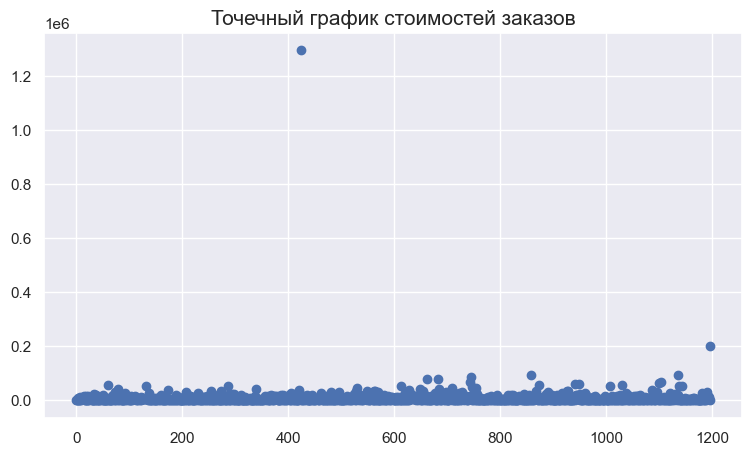

In [28]:
print(orders.sort_values(by='revenue', ascending=False).head(10))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов', fontsize=15);

На данном графике заметен заказ с аномально высокой стоимостью, который вызвал всплеск на графиках кумулятивных метрик.

      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  1294500     B
1196      3936777065  2108080724 2019-08-15   202740     B
858        192721366  1316129916 2019-08-27    93940     A
1136       666610489  1307669133 2019-08-13    92550     A
744       3668308183   888512513 2019-08-27    86620     B
682       1216533772  4266935830 2019-08-29    78990     B
662       1811671147  4266935830 2019-08-29    78990     A
743       3603576309  4133034833 2019-08-09    67990     A
1103      1348774318  1164614297 2019-08-12    66350     A
1099       316924019   148427295 2019-08-12    65710     A


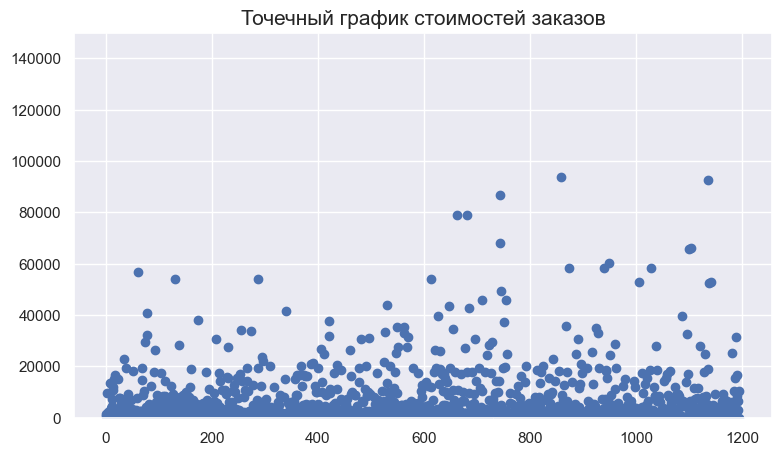

In [29]:
print(orders.sort_values(by='revenue', ascending=False).head(10))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов', fontsize=15)
plt.ylim(0, 150000)
plt.show()

Основная масса заказов не привышает 20000.

**Задача 9.** Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [30]:
print(orders.head(10))
print(np.percentile(orders['revenue'], [95, 99]))

   transaction_id  visitor_id       date  revenue group
0      3667963787  3312258926 2019-08-15     1650     B
1      2804400009  3642806036 2019-08-15      730     B
2      2961555356  4069496402 2019-08-15      400     A
3      3797467345  1196621759 2019-08-15     9759     B
4      2282983706  2322279887 2019-08-15     2308     B
5       182168103   935554773 2019-08-15     2210     B
6       398296753  2900797465 2019-08-15     1860     B
7      2626614568    78758296 2019-08-15     1044     A
8      1576988021   295230930 2019-08-15    13710     A
9      1506739906  1882260405 2019-08-15     1855     B
[28000.  58233.2]


<font color='green'>***Определяем границу по величине 99% перцентиля (58233)***</font>

**Задача 10.** Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Введу основную и альтернативные гипотезы:

**Нулевая гипотеза:** *различий в среднем количестве заказов на посетителя между группами нет*

**Альтернативная гипотеза:** *различия в среднем количестве заказов на посетителя между группами есть*
 
*Для проверки гипотез буду использовать непараметрический тест Уилкоксона-Манна-Уитни.*

*Для уровеня значимости установлю стандартный уровень статистической значимости, равный 0.05.*

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB: в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [32]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


print('P-value: {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост В к А: {0:.3%}'.format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительный прирост В к А: 13.808%


P-value: 0.017, между группами есть разница.
Относительный прирост В к А: 13.808%.

***В среднем количестве заказов на посетителя между группами по «сырым» данным есть различия.***

**Задача 11.** Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Введу основную и альтернативные гипотезы:

**Нулевая гипотеза:** *различий в среднем чеке заказа между группами нет*

**Альтернативная гипотеза:** *различия в среднем чеке заказа на посетителя между группами есть*
 
*Для проверки гипотез буду использовать непараметрический тест Уилкоксона-Манна-Уитни.*

*Для уровеня значимости установлю стандартный уровень статистической значимости, равный 0.05.*

In [33]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост В к А: {0:.3%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Относительный прирост В к А: 25.871%


***P-value больше 0.05. Значит, причин считать, что в среднем чеке есть различия, нет.***

**Задача 12.** Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 58233. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
Узнаем, сколько всего аномальных пользователей методом shape().

In [34]:
#ввожу соответствующие коду обозначения для использования их при получении "очищенных" данных

many_orders = np.percentile(ordersByVisitors['orders'], 99)
expensive_orders = np.percentile(orders['revenue'], 99)

In [35]:
usersWithExpensiveOrders = orders[orders['revenue'] > expensive_orders]['visitor_id']

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > many_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > many_orders]['userId'],
    ],
    axis=0,
)
    

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
abnormalUsers.shape[0]

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64


15

***Всего 15 аномальных пользователей.***

Узнаем, как их действия повлияли на результаты теста.

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост В к А: {0:.3%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.014
Относительный прирост В к А: 15.331%


***На очищенных данных в среднем количестве заказов на посетителя между группами есть, а относительный прирост группы В отнистельно группы А по данному показателю увеличился на 15.3%***

**Задача 13.** Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [37]:
print(
    'P-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный прирост В к А: {0:.3%}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.851
Относительный прирост В к А: -0.575%


***P-value больше 0.05. Причин считать, что в среднем чеке есть различия, нет. По разнице средних чеков групп различий практически нет.***

**Задача 14.** Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

***Принятое решение: рекомендую остановить тест, зафиксировав победу группы B.***

**<font color='green'>Основные выводы, повлиявшие на принятие данного решения:</font>**

    1. Есть статистически значимое различие в части среднего количества заказов на посетителя между группами как по «сырым», так и по очищенным от аномалий данным: резульат группы В выше, чем А, на 14-15%;
    
    2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по "очищенным" данным. При этом средний чек группы В выше (на "очищенных" данных - на 2%);
    
    3. График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В лучше группы А.